In [ ]:
# Nama: Aulya Salsabila Khairunnisa
# NIM: 24060122140163
# Nama Dataset: Iris Dataset
# Link Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [2]:
# Mengimpor pustaka yang dibutuhkan seperti pandas untuk manipulasi data, sklearn untuk machine learning, dan metrics untuk evaluasi model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold

# Dataset Iris dimuat dari UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=columns)

# Memisahkan fitur dan label
X = dataset.iloc[:, 0:4].values
Y = dataset.iloc[:, 4].values

In [6]:
# Dataset dibagi menjadi data latih (80%) dan data validasi (20%)
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [7]:
# Decision Tree digunakan untuk prediksi
dt_model = DecisionTreeClassifier(random_state=seed)

# Validasi silang dengan 10 lipatan untuk mengevaluasi model secara stabil
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
dt_scores = cross_val_score(dt_model, X_train, Y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil
print("Decision Tree - Cross-validation mean accuracy:", dt_scores.mean())
print("Decision Tree - Cross-validation std deviation:", dt_scores.std())

# Akurasi, confusion matrix, dan classification report dihitung untuk masing-masing algoritma
dt_model.fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_validation)

print("\nDecision Tree - Validation Accuracy:", accuracy_score(Y_validation, dt_predictions))
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(Y_validation, dt_predictions))
print("Decision Tree - Classification Report:\n", classification_report(Y_validation, dt_predictions))

Decision Tree - Cross-validation mean accuracy: 0.95
Decision Tree - Cross-validation std deviation: 0.07637626158259735

Decision Tree - Validation Accuracy: 0.9
Decision Tree - Confusion Matrix:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
Decision Tree - Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [8]:
# Random Forest digunakan untuk prediksi
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed)

# Validasi silang dengan 10 lipatan untuk mengevaluasi model secara stabil
rf_scores = cross_val_score(rf_model, X_train, Y_train, cv=kfold, scoring='accuracy')

# Menampilkan hasil
print("Random Forest - Cross-validation mean accuracy:", rf_scores.mean())
print("Random Forest - Cross-validation std deviation:", rf_scores.std())

# Akurasi, confusion matrix, dan classification report dihitung untuk masing-masing algoritma
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_validation)

print("\nRandom Forest - Validation Accuracy:", accuracy_score(Y_validation, rf_predictions))
print("Random Forest - Confusion Matrix:\n", confusion_matrix(Y_validation, rf_predictions))
print("Random Forest - Classification Report:\n", classification_report(Y_validation, rf_predictions))

Random Forest - Cross-validation mean accuracy: 0.9666666666666666
Random Forest - Cross-validation std deviation: 0.04082482904638632

Random Forest - Validation Accuracy: 0.8666666666666667
Random Forest - Confusion Matrix:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
Random Forest - Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [ ]:
# KESIMPULAN
# Decision Tree: Akurasi rata-rata dari validasi silang dan data validasi mungkin lebih rendah karena overfitting pada dataset kecil.
# Random Forest: Model lebih stabil dan memberikan akurasi lebih tinggi karena sifatnya yang menggabungkan beberapa pohon keputusan.
# Dataset Iris dapat diklasifikasikan dengan sangat baik karena dataset ini sederhana dan terstruktur.

In [ ]:
# Nama: Aulya Salsabila Khairunnisa
# NIM: 24060122140163
# Nama Dataset: Breast Cancer Wisconsin Dataset
# Link Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

In [13]:
# Import libraries
import pandas as pd

# URL dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Kolom dataset berdasarkan deskripsi dataset UCI
columns = ['ID', 'Diagnosis',
           'Radius_Mean', 'Texture_Mean', 'Perimeter_Mean', 'Area_Mean', 'Smoothness_Mean', 'Compactness_Mean',
           'Concavity_Mean', 'Concave_Points_Mean', 'Symmetry_Mean', 'Fractal_Dimension_Mean',
           'Radius_Se', 'Texture_Se', 'Perimeter_Se', 'Area_Se', 'Smoothness_Se', 'Compactness_Se',
           'Concavity_Se', 'Concave_Points_Se', 'Symmetry_Se', 'Fractal_Dimension_Se',
           'Radius_Worst', 'Texture_Worst', 'Perimeter_Worst', 'Area_Worst', 'Smoothness_Worst',
           'Compactness_Worst', 'Concavity_Worst', 'Concave_Points_Worst', 'Symmetry_Worst',
           'Fractal_Dimension_Worst']

# Dataset diakses langsung dari UCI dan kolom-kolomnya diberi nama berdasarkan dokumentasi
dataset = pd.read_csv(url, names=columns)

# Menampilkan beberapa baris pertama
print("Dataset:")
print(dataset.head(10).to_string())

# Menghapus kolom ID yang tidak relevan dan mengonversi label ke numerik
dataset = dataset.drop(columns=['ID'])

Dataset:
         ID Diagnosis  Radius_Mean  Texture_Mean  Perimeter_Mean  Area_Mean  Smoothness_Mean  Compactness_Mean  Concavity_Mean  Concave_Points_Mean  Symmetry_Mean  Fractal_Dimension_Mean  Radius_Se  Texture_Se  Perimeter_Se  Area_Se  Smoothness_Se  Compactness_Se  Concavity_Se  Concave_Points_Se  Symmetry_Se  Fractal_Dimension_Se  Radius_Worst  Texture_Worst  Perimeter_Worst  Area_Worst  Smoothness_Worst  Compactness_Worst  Concavity_Worst  Concave_Points_Worst  Symmetry_Worst  Fractal_Dimension_Worst
0    842302         M        17.99         10.38          122.80     1001.0          0.11840           0.27760         0.30010              0.14710         0.2419                 0.07871     1.0950      0.9053         8.589   153.40       0.006399         0.04904       0.05373            0.01587      0.03003              0.006193         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119                0.2654          0.4601   

In [13]:
# Menampilkan dimensi, isi, distribusi, statistik, dan visualisasi dataset
print("Dimensi Dataset:", dataset.shape)

Dimensi Dataset: (569, 31)


In [14]:
print("Isi Dataset:")
print(dataset.head(10).to_string())

Isi Dataset:
  Diagnosis  Radius_Mean  Texture_Mean  Perimeter_Mean  Area_Mean  Smoothness_Mean  Compactness_Mean  Concavity_Mean  Concave_Points_Mean  Symmetry_Mean  Fractal_Dimension_Mean  Radius_Se  Texture_Se  Perimeter_Se  Area_Se  Smoothness_Se  Compactness_Se  Concavity_Se  Concave_Points_Se  Symmetry_Se  Fractal_Dimension_Se  Radius_Worst  Texture_Worst  Perimeter_Worst  Area_Worst  Smoothness_Worst  Compactness_Worst  Concavity_Worst  Concave_Points_Worst  Symmetry_Worst  Fractal_Dimension_Worst
0         M        17.99         10.38          122.80     1001.0          0.11840           0.27760         0.30010              0.14710         0.2419                 0.07871     1.0950      0.9053         8.589   153.40       0.006399         0.04904       0.05373            0.01587      0.03003              0.006193         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119                0.2654          0.4601                  0

In [15]:
print("Distribusi Diagnosis:")
print(dataset['Diagnosis'].value_counts())

Distribusi Diagnosis:
Diagnosis
B    357
M    212
Name: count, dtype: int64


In [8]:
print("Ringkasan Statistik Dataset:")
print(dataset.describe().to_string())

Ringkasan Statistik Dataset:
       Radius_Mean  Texture_Mean  Perimeter_Mean    Area_Mean  Smoothness_Mean  Compactness_Mean  Concavity_Mean  Concave_Points_Mean  Symmetry_Mean  Fractal_Dimension_Mean   Radius_Se  Texture_Se  Perimeter_Se     Area_Se  Smoothness_Se  Compactness_Se  Concavity_Se  Concave_Points_Se  Symmetry_Se  Fractal_Dimension_Se  Radius_Worst  Texture_Worst  Perimeter_Worst   Area_Worst  Smoothness_Worst  Compactness_Worst  Concavity_Worst  Concave_Points_Worst  Symmetry_Worst  Fractal_Dimension_Worst
count   569.000000    569.000000      569.000000   569.000000       569.000000        569.000000      569.000000           569.000000     569.000000              569.000000  569.000000  569.000000    569.000000  569.000000     569.000000      569.000000    569.000000         569.000000   569.000000            569.000000    569.000000     569.000000       569.000000   569.000000        569.000000         569.000000       569.000000            569.000000      569.000000 

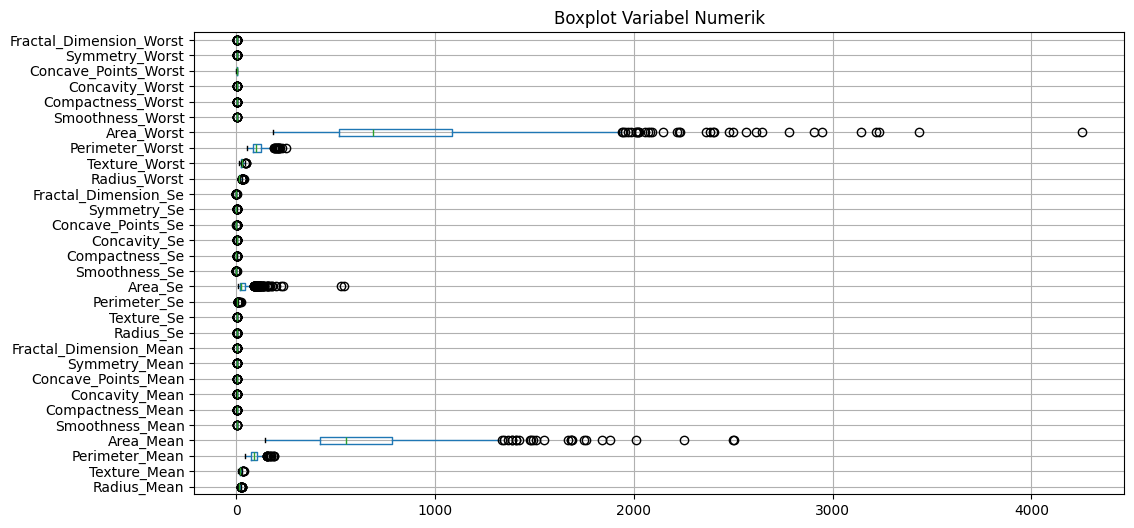

In [10]:
import matplotlib.pyplot as plt

# Boxplot untuk variabel numerik
dataset.iloc[:, 1:].boxplot(figsize=(12, 6), vert=False)
plt.title("Boxplot Variabel Numerik")
plt.show()

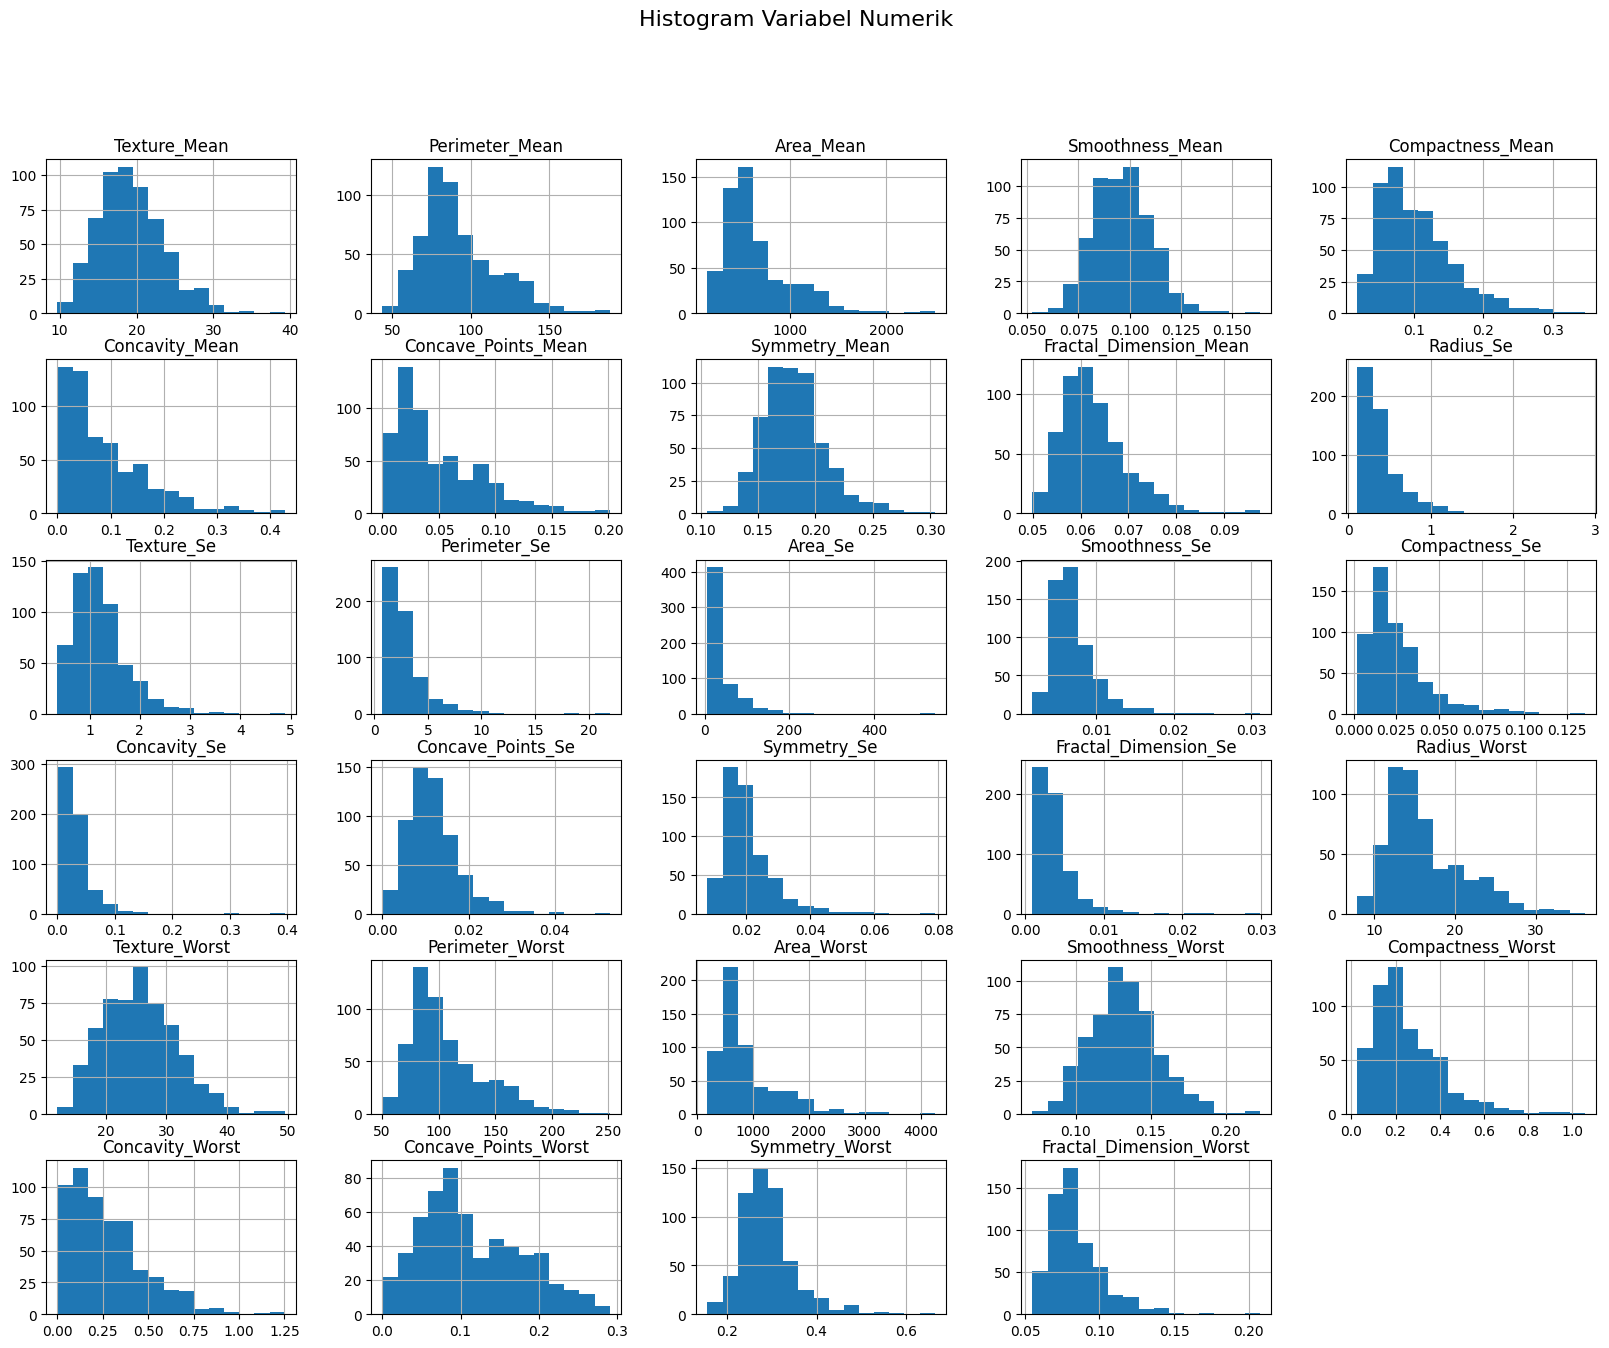

In [15]:
# Histogram
dataset.iloc[:, 2:].hist(bins=15, figsize=(20, 15))
plt.suptitle("Histogram Variabel Numerik", fontsize=16)
plt.show()

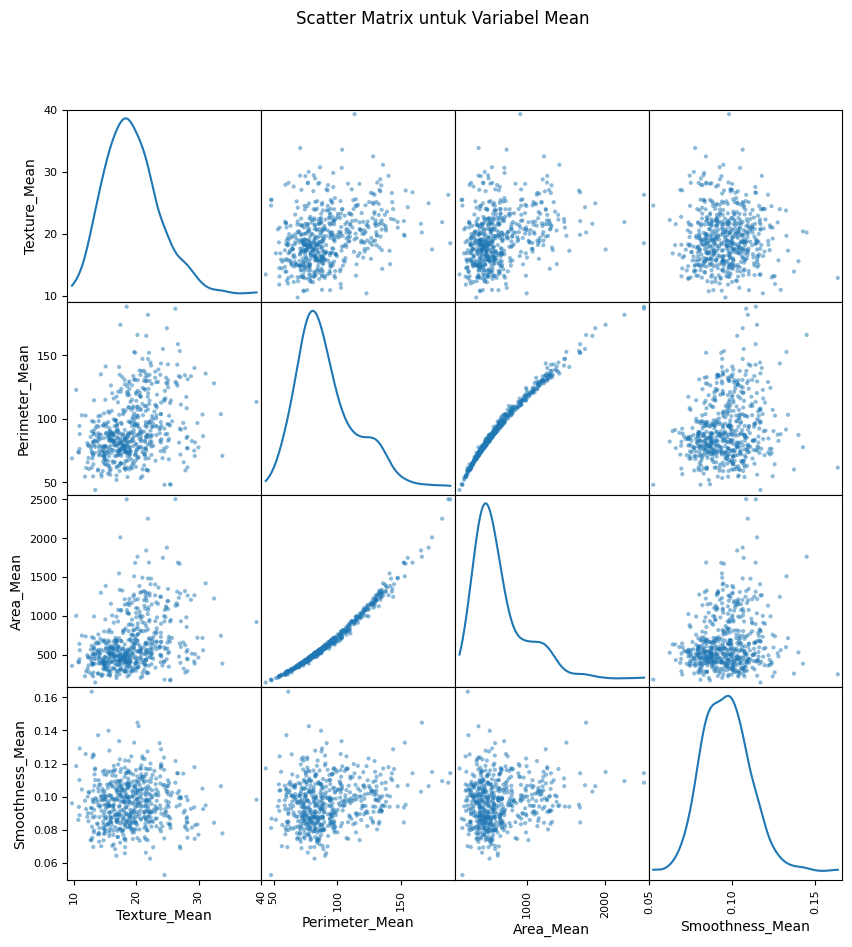

In [18]:
from pandas.plotting import scatter_matrix

# Scatter matrix
scatter_matrix(dataset.iloc[:, 2:6], figsize=(10, 10), diagonal='kde')
plt.suptitle("Scatter Matrix untuk Variabel Mean")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# Konversi Diagnosis ke numerik (M = 1, B = 0)
dataset['Diagnosis'] = dataset['Diagnosis'].map({'M': 1, 'B': 0})

# Fitur dan label
X = dataset.iloc[:, 1:]
Y = dataset['Diagnosis']

# Membagi dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=7)

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
Y = data.target

# Membagi data menjadi data latih dan validasi
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=7)

# Definisi model
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Validasi silang
results = []
names = []
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

print("Hasil Validasi:")
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.3f} ({cv_results.std():.3f})")

# Memilih model terbaik berdasarkan hasil validasi silang
best_model = SVC()
best_model.fit(X_train, Y_train)
predictions = best_model.predict(X_validation)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model Terbaik:")
print("Akurasi:", accuracy_score(Y_validation, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_validation, predictions))
print("Classification Report:\n", classification_report(Y_validation, predictions))

Hasil Validasi:
KNN: 0.936 (0.045)
NB: 0.934 (0.041)
SVM: 0.907 (0.058)

Evaluasi Model Terbaik:
Akurasi: 0.9035087719298246
Confusion Matrix:
 [[29 11]
 [ 0 74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [ ]:
# KESIMPULAN
# Dataset terdiri dari 569 sampel, dengan distribusi diagnosis M (malignant) dan B (benign).
# Dari hasil validasi, model SVM memberikan akurasi terbaik untuk prediksi, diikuti oleh KNN dan Naive Bayes.
# Confusion Matrix dan Classification Report menunjukkan bahwa SVM sangat baik dalam memprediksi tumor ganas dan jinak.